In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../_styling/')
from style import prep_plot, BLACK, GRAY1, GRAY2, GRAY3

In [2]:
egov = pd.read_csv("EGOV_DATA_2022.csv", index_col=1)
egov.index = [i.strip() for i in egov.index]
egov.rename(index={
    "United States of America": "United States",
    "Democratic People's Republic of Korea": "North Korea",
    "Republic of Korea": "South Korea",
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Viet Nam": "Vietnam",
    "Türkiye": "Turkey",
    "Iran (Islamic Republic of)": "Iran",
    "Syrian Arab Republic": "Syria",
    "United Republic of Tanzania": "Tanzania",
    "Democratic Republic of the Congo": "Congo (Kinshasa)",
    "Congo": "Congo (Brazzaville)",
    "Côte d'Ivoire": "Cote d\'Ivoire",
    "Lao People's Democratic Republic": "Laos",
    "Gambia": "The Gambia",
    "Republic of Moldova": "Moldova",
    "Georgia (Country)": "Georgia"
}, inplace=True)

fh = pd.read_excel("All_data_FIW_2013-2024.xlsx", sheet_name="FIW13-24", skiprows=1)
fh = fh[fh['Edition'] == 2022]
fh['Freedom House Index'] = fh['Total'] / 100
fh = fh[['Country/Territory', 'Region', 'Status', 'Freedom House Index']]
fh.set_index('Country/Territory', inplace=True)
fh.index = [i.strip() for i in fh.index]

In [3]:
df = fh.join(egov, how='right')
df.head()

,Region,Status,Freedom House Index,Survey Year,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
Iraq,Middle East,NF,0.29,2022,146,0.4383,0.2159,0.2060,0.5888,0.5201
Ireland,Europe,F,0.97,2022,30,0.8567,0.6818,0.7796,0.9618,0.8287
Israel,Middle East,F,0.76,2022,16,0.8885,0.7159,0.8745,0.8994,0.8915
Italy,Europe,F,0.90,2022,37,0.8375,0.7273,0.8659,0.8606,0.7860
Jamaica,Americas,F,0.80,2022,102,0.5906,0.2841,0.4914,0.7148,0.5658


<Figure size 3740x2500 with 0 Axes>

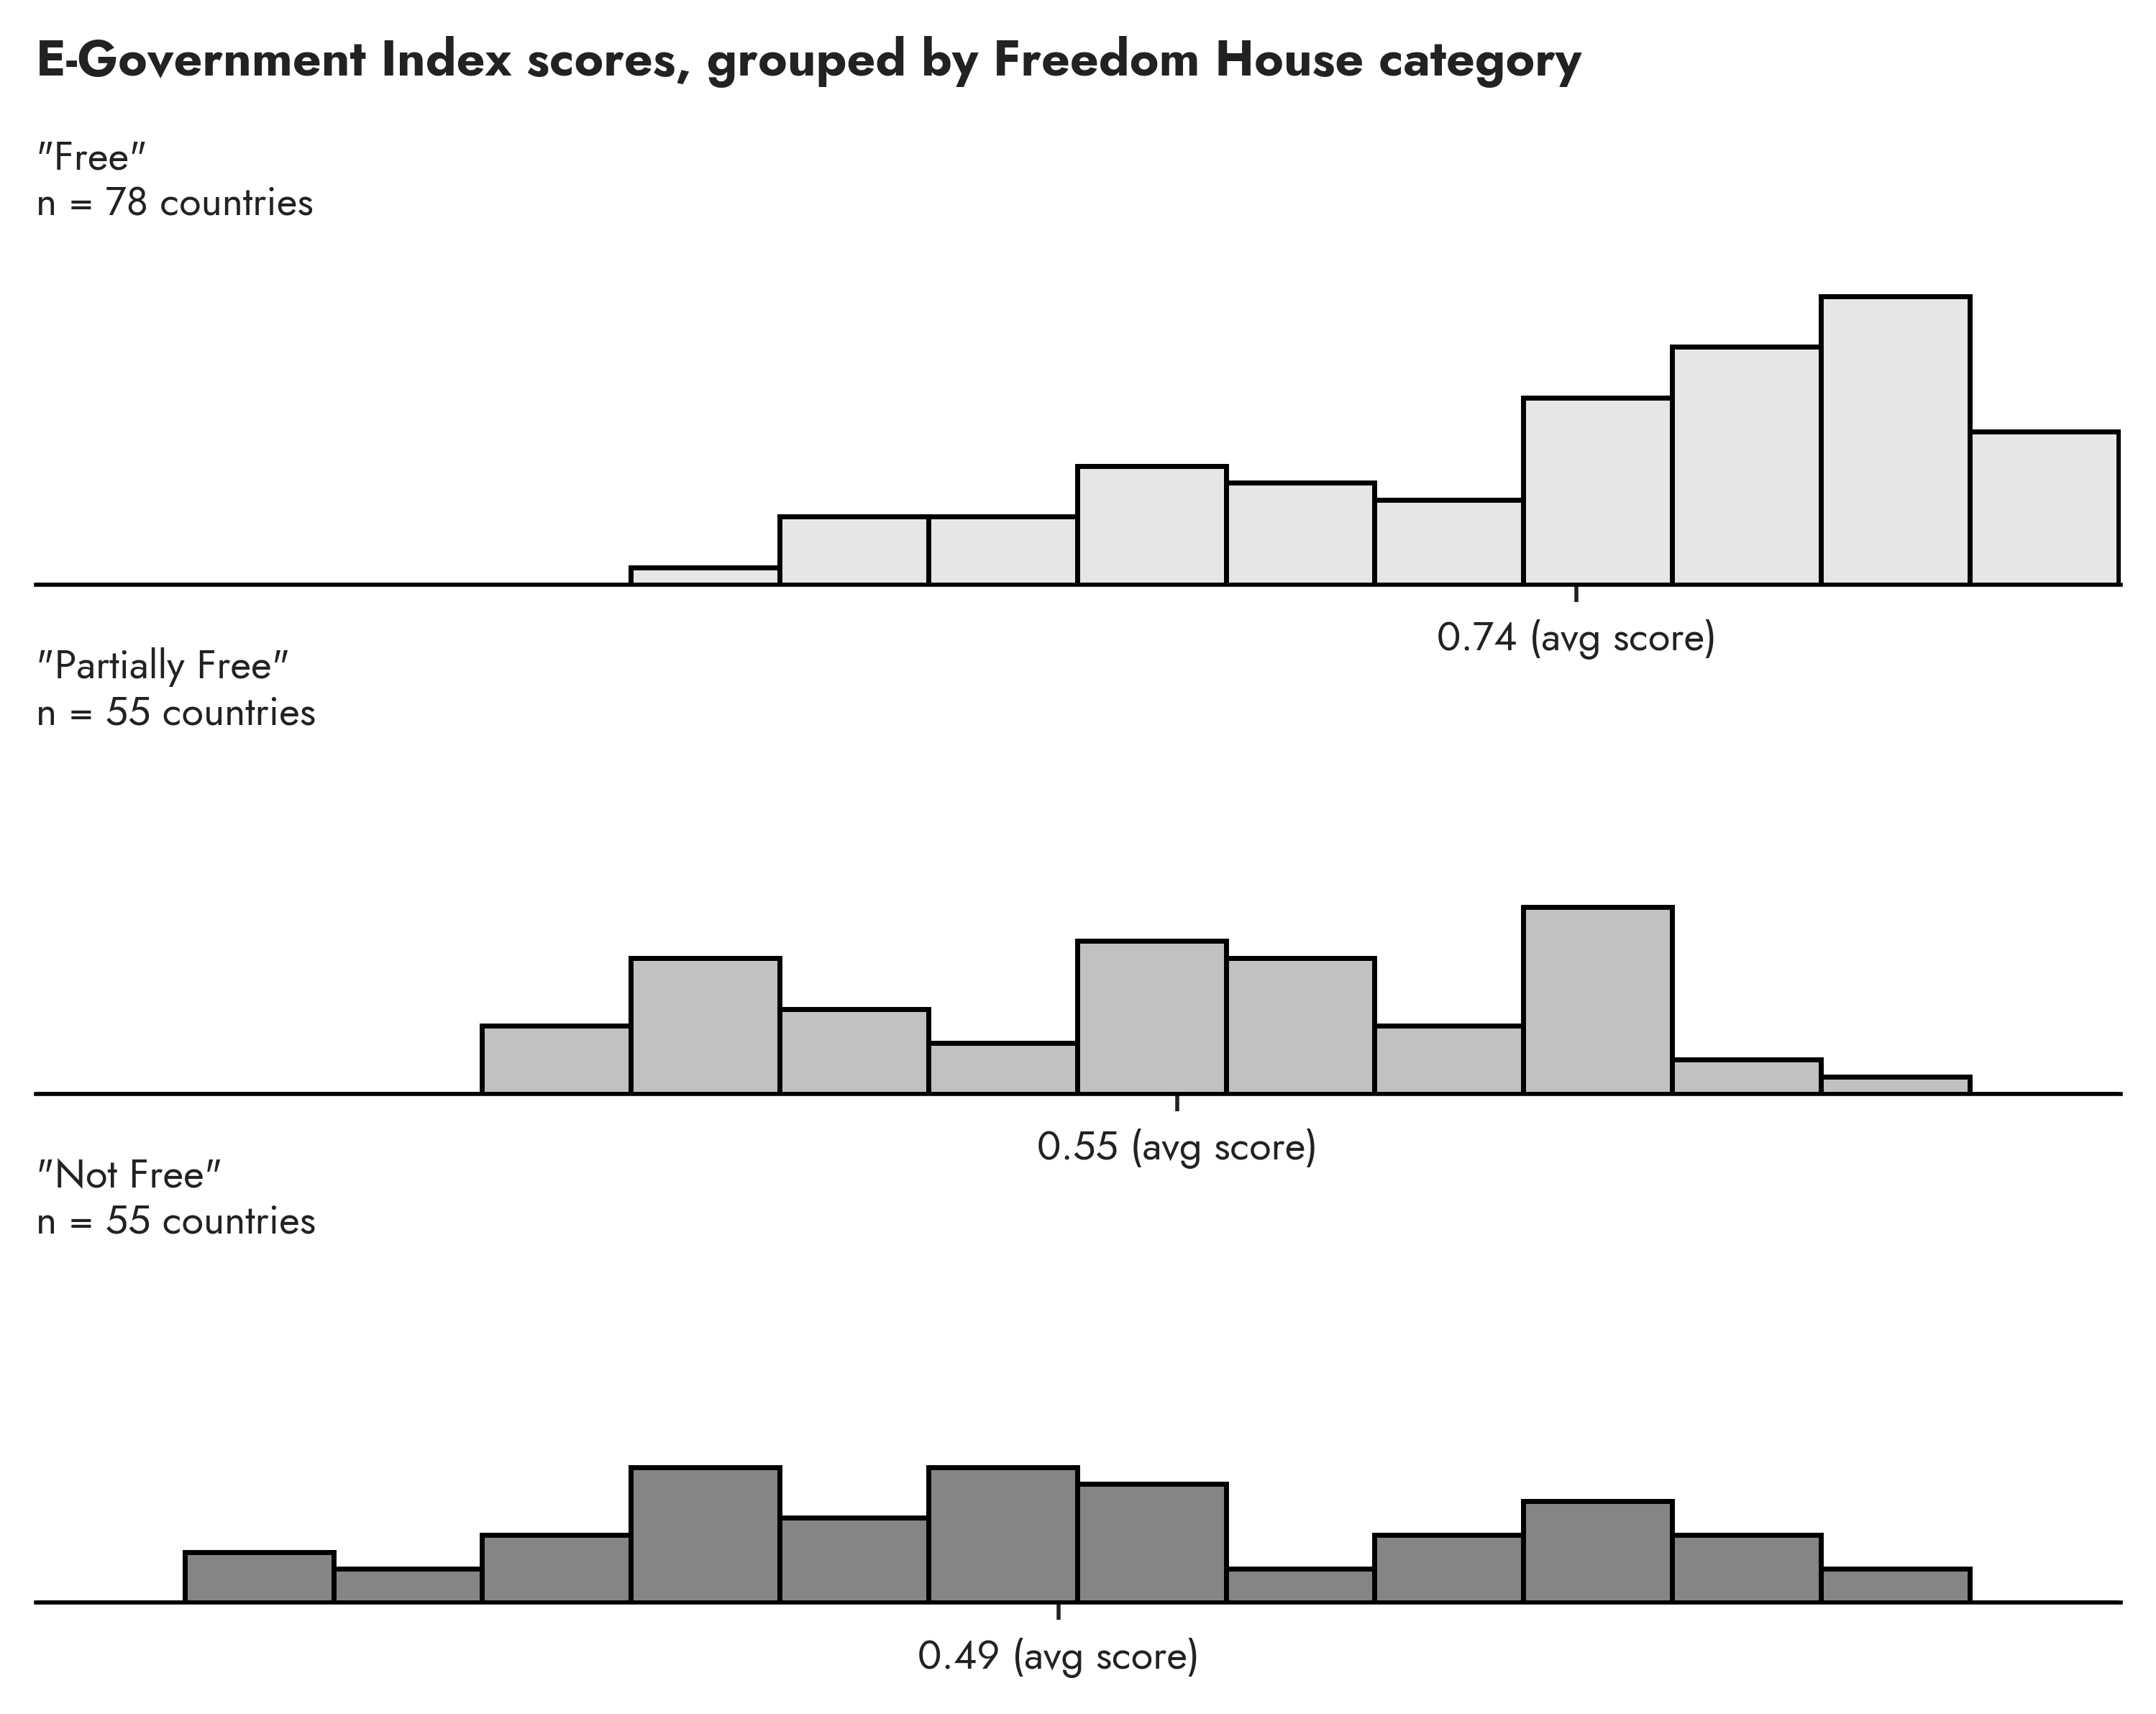

In [6]:
plt = prep_plot(fig_height=5)
fig, axes = plt.subplots(nrows=3)
bins = np.linspace(0,1,15)

titles = {
    "F": "Free",
    "PF": "Partially Free",
    "NF": "Not Free"
}

def plot_hist(status, color, ax):
    xs = df[df['Status'] == status]['E-Government Index']
    avg = xs.mean()
    sns.histplot(xs, kde=False, color=color, bins=bins, ax=ax)
    ax.set_xlim(0,1.001)
    ax.set_ylim(0,20)
    ax.set_xticks([avg], labels=[f"{avg:.2f} (avg score)"], fontsize=8)
    ax.set_yticks([])   
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f'"{titles.get(status)}"\nn = {len(xs)} countries', loc='left', fontsize=8)
    ax.spines['left'].set_visible(False)

    
plot_hist('F', GRAY3, axes[0])
plot_hist('PF', GRAY2, axes[1])
plot_hist('NF', GRAY1, axes[2])

plt.subplots_adjust(hspace=0.5)

axes[0].text(x=0, y=30, s="E-Government Index scores, grouped by Freedom House category", weight='bold')

plt.savefig("egov_hists.png", bbox_inches="tight")

<Figure size 3740x3740 with 0 Axes>

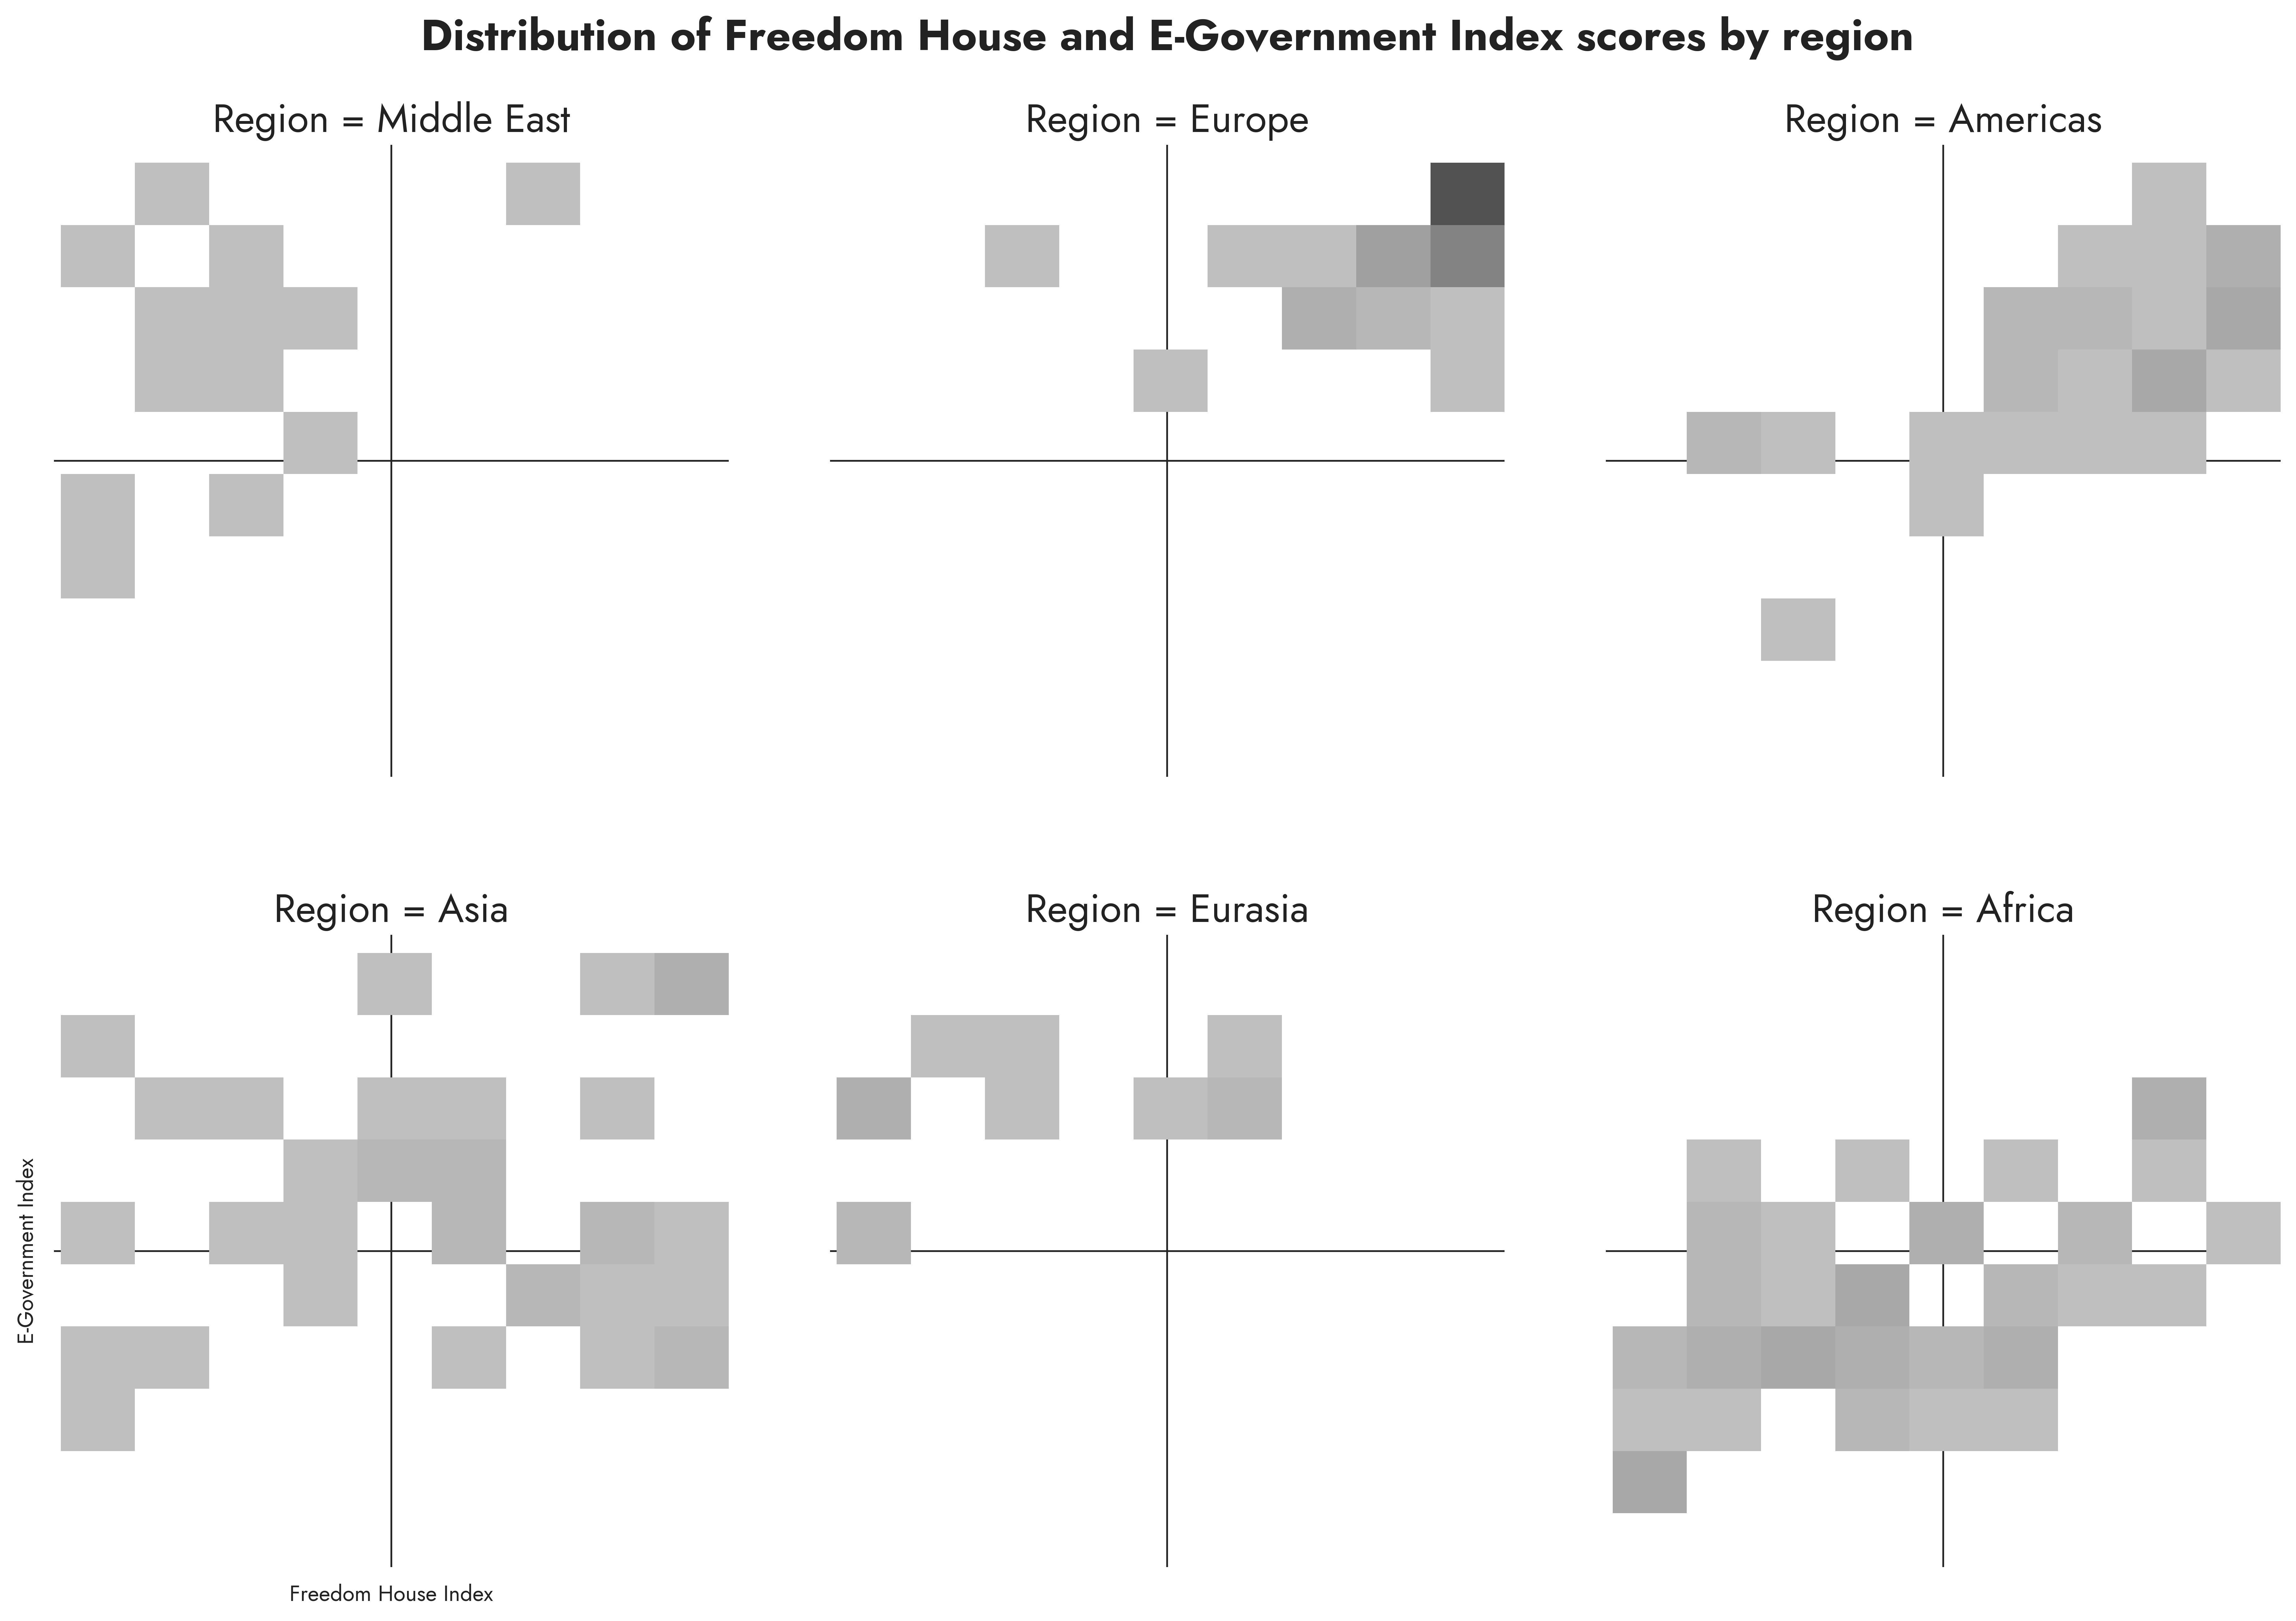

In [5]:
plt = prep_plot(fig_height=7.48)
fig = sns.displot(
    data=df,
#    rug=True,
    x='Freedom House Index',
    y='E-Government Index',
    col='Region',
    col_wrap=3,
    color=GRAY2,
    zorder=2
)
for (i,ax) in enumerate(fig.axes):
    title = ax.get_title()
    ax.set_title(title, fontsize=18)
    ax.grid(zorder=0, color=BLACK)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xticks([.5], labels=[""])
    ax.set_yticks([.5], labels=[""])
    ax.tick_params(axis='both', length=0)
    ax.spines[["bottom", "left"]].set_visible(False)
    if i != 3:
        ax.set_xlabel("")
        ax.set_ylabel("")

fig.fig.subplots_adjust(hspace=0.25, wspace=0.15)    
fig.axes[1].text(
    x=.5, 
    y=1.15, 
    s="Distribution of Freedom House and E-Government Index scores by region", 
    weight='bold',
    ha='center',
    fontsize=20
)

plt.savefig("egov_facets.png", bbox_inches="tight")